In [1]:
import numpy as np
import tensorflow as tf
import pickle, time
from copy import deepcopy
from shutil import copy
from tqdm import tqdm_notebook as tqdm
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import powerlaw

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
print(np.__version__)
print(sklearn.__version__)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.14.5
0.19.1


In [2]:
def get_pareto(mu, M=5000, Q=1):
    W = np.random.pareto(mu,size=(M,int(Q*M)))
    N, M = np.max(W.shape),np.min(W.shape)
    #evals, _ = RMT_Util.eigenspectrum(W)
    
    X = (1/N)*np.dot(W,W.T)
    svd = TruncatedSVD(n_components=M-1, n_iter=7, random_state=42)
    svd.fit(X)  
    evals = svd.singular_values_
    #evals = sv*sv

    return W, evals

In [3]:
data_alphas = []
M=1000
#mus = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,2.0,  2.1, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9 , 3.0, 3.1, 
#       3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4, 4.5, 5.0, 5.5]
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in mus:
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data)
    data_alphas.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))


Calculating best minimal value for power law fit
/home/ubuntu/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


data sample: mu+1 1.5118838184576093 alpha 1.4670808451958788


Calculating best minimal value for power law fit


data sample: mu+1 1.5332935589893648 alpha 1.4349066591048558


Calculating best minimal value for power law fit


data sample: mu+1 1.6107447309431997 alpha 1.6200408116636076


Calculating best minimal value for power law fit


data sample: mu+1 1.6110438756072587 alpha 1.5509590719763535


Calculating best minimal value for power law fit


data sample: mu+1 1.6249392697865028 alpha 1.5344677399822393


Calculating best minimal value for power law fit


data sample: mu+1 1.663515092535534 alpha 1.611929786888919


Calculating best minimal value for power law fit


data sample: mu+1 1.6732622458422242 alpha 1.5777255594625235


Calculating best minimal value for power law fit


data sample: mu+1 1.7034049869852983 alpha 1.7097237361784612


Calculating best minimal value for power law fit


data sample: mu+1 1.792093795499012 alpha 1.8370457321443836


Calculating best minimal value for power law fit


data sample: mu+1 1.7959218105630255 alpha 1.8641662385845275


Calculating best minimal value for power law fit


data sample: mu+1 1.8522606464829483 alpha 1.748884991556073


Calculating best minimal value for power law fit


data sample: mu+1 1.8558817836543196 alpha 1.8692750957326068


Calculating best minimal value for power law fit


data sample: mu+1 1.9226085532648185 alpha 1.9437584713154543


Calculating best minimal value for power law fit


data sample: mu+1 1.9491646556964926 alpha 1.828693028458719


Calculating best minimal value for power law fit


data sample: mu+1 2.00285747992883 alpha 2.150513461660261


Calculating best minimal value for power law fit


data sample: mu+1 2.0111082654274828 alpha 1.8549654367900947


Calculating best minimal value for power law fit


data sample: mu+1 2.015508827473629 alpha 2.054841361350628


Calculating best minimal value for power law fit


data sample: mu+1 2.043329221121546 alpha 1.9439317278340131


Calculating best minimal value for power law fit


data sample: mu+1 2.1054413860377172 alpha 2.117853240258446


Calculating best minimal value for power law fit


data sample: mu+1 2.1711963482827636 alpha 2.036612835616449


Calculating best minimal value for power law fit


data sample: mu+1 2.2166898558330086 alpha 1.9661628461277365


Calculating best minimal value for power law fit


data sample: mu+1 2.2394432614352597 alpha 1.813583905066015


Calculating best minimal value for power law fit


data sample: mu+1 2.27482264740011 alpha 2.3993674528549915


Calculating best minimal value for power law fit


data sample: mu+1 2.2815414776252068 alpha 2.1235237608869886


Calculating best minimal value for power law fit


data sample: mu+1 2.281853249397927 alpha 2.464511763419571


Calculating best minimal value for power law fit


data sample: mu+1 2.295359331493804 alpha 1.9243312579523901


Calculating best minimal value for power law fit


data sample: mu+1 2.3165833756690946 alpha 2.117000406881713


Calculating best minimal value for power law fit


data sample: mu+1 2.4567388504379046 alpha 2.1282975311326906


Calculating best minimal value for power law fit


data sample: mu+1 2.464466173279656 alpha 2.2391208116743013


Calculating best minimal value for power law fit


data sample: mu+1 2.5505815273621675 alpha 2.8105587013410585


Calculating best minimal value for power law fit


data sample: mu+1 2.554884916063214 alpha 2.3976785553032505


Calculating best minimal value for power law fit


data sample: mu+1 2.5841753778422527 alpha 2.233653013476307


Calculating best minimal value for power law fit


data sample: mu+1 2.616674578727089 alpha 2.293593964308566


Calculating best minimal value for power law fit


data sample: mu+1 2.6190023642034097 alpha 2.4723241161991663


Calculating best minimal value for power law fit


data sample: mu+1 2.622645340694285 alpha 2.338843312052107


Calculating best minimal value for power law fit


data sample: mu+1 2.699792523642797 alpha 2.318457065759304


Calculating best minimal value for power law fit


data sample: mu+1 2.7373095367524796 alpha 2.600115785480761


Calculating best minimal value for power law fit


data sample: mu+1 2.7556245328141236 alpha 2.4675499652912194


Calculating best minimal value for power law fit


data sample: mu+1 2.8143364947106546 alpha 2.251645574266269


Calculating best minimal value for power law fit


data sample: mu+1 2.8445179384707364 alpha 2.3915853072336155


Calculating best minimal value for power law fit


data sample: mu+1 2.866973016699196 alpha 2.338353313991486


Calculating best minimal value for power law fit


data sample: mu+1 2.869572411240845 alpha 2.5087743251988632


Calculating best minimal value for power law fit


data sample: mu+1 2.890846147123608 alpha 2.282452605791332


Calculating best minimal value for power law fit


data sample: mu+1 2.911061140009178 alpha 2.3799312435571287


Calculating best minimal value for power law fit


data sample: mu+1 2.928040989241647 alpha 2.34602754641352


Calculating best minimal value for power law fit


data sample: mu+1 2.9463193957638194 alpha 2.077187480327786


Calculating best minimal value for power law fit


data sample: mu+1 2.94948064158067 alpha 3.247042573378082


Calculating best minimal value for power law fit


data sample: mu+1 2.9795737930039574 alpha 2.453684262103491


Calculating best minimal value for power law fit


data sample: mu+1 2.981136699297095 alpha 2.2723706139761974


Calculating best minimal value for power law fit


data sample: mu+1 2.9973168616997716 alpha 2.460055251030689


Calculating best minimal value for power law fit


data sample: mu+1 3.04551777206831 alpha 2.809700585183265


Calculating best minimal value for power law fit


data sample: mu+1 3.0532711933757217 alpha 2.856197463463044


Calculating best minimal value for power law fit


data sample: mu+1 3.068489721887295 alpha 2.7164919176586464


Calculating best minimal value for power law fit


data sample: mu+1 3.0752122791726855 alpha 2.211907347646564


Calculating best minimal value for power law fit


data sample: mu+1 3.1096765095422487 alpha 2.6289709647424138


Calculating best minimal value for power law fit


data sample: mu+1 3.1206502642406946 alpha 2.1700295528300058


Calculating best minimal value for power law fit


data sample: mu+1 3.148369563583907 alpha 2.5839767337030173


Calculating best minimal value for power law fit


data sample: mu+1 3.2467285691477006 alpha 2.7205420824950552


Calculating best minimal value for power law fit


data sample: mu+1 3.267848924697598 alpha 2.680556737614597


Calculating best minimal value for power law fit


data sample: mu+1 3.2989060691601333 alpha 2.61440452941463


Calculating best minimal value for power law fit


data sample: mu+1 3.319286667219074 alpha 2.687719671951304


Calculating best minimal value for power law fit


data sample: mu+1 3.411614682077487 alpha 2.5364714633921728


Calculating best minimal value for power law fit


data sample: mu+1 3.4301588740654347 alpha 2.8242899134158357


Calculating best minimal value for power law fit


data sample: mu+1 3.447048480682021 alpha 3.052363313023272


Calculating best minimal value for power law fit


data sample: mu+1 3.462182044168644 alpha 2.8428366319774643


Calculating best minimal value for power law fit


data sample: mu+1 3.469108562012999 alpha 2.580254908564349


Calculating best minimal value for power law fit


data sample: mu+1 3.5162924664092836 alpha 2.4234428931425644


Calculating best minimal value for power law fit


data sample: mu+1 3.531707232226335 alpha 2.6699831746528933


Calculating best minimal value for power law fit


data sample: mu+1 3.584509650095702 alpha 2.3817709320684246


Calculating best minimal value for power law fit


data sample: mu+1 3.587420380653913 alpha 3.0682215666905046


Calculating best minimal value for power law fit


data sample: mu+1 3.60247668273896 alpha 2.359314624874358


Calculating best minimal value for power law fit


data sample: mu+1 3.6575797528802574 alpha 3.6587570164516543


Calculating best minimal value for power law fit


data sample: mu+1 3.6667805271129654 alpha 2.5294930683688843


Calculating best minimal value for power law fit


data sample: mu+1 3.74354983421145 alpha 2.525811206035954


Calculating best minimal value for power law fit


data sample: mu+1 3.767100877702148 alpha 3.1894413598146083


Calculating best minimal value for power law fit


data sample: mu+1 3.7981730096105544 alpha 2.2893641643072424


Calculating best minimal value for power law fit


data sample: mu+1 3.8215978874469045 alpha 2.479585388978733


Calculating best minimal value for power law fit


data sample: mu+1 3.8435036355349848 alpha 2.8296308332834235


Calculating best minimal value for power law fit


data sample: mu+1 3.867160061400033 alpha 2.4253513094133305


Calculating best minimal value for power law fit


data sample: mu+1 3.9278812357577864 alpha 3.70442986423591


Calculating best minimal value for power law fit


data sample: mu+1 3.947240826377919 alpha 3.0555432595888266


Calculating best minimal value for power law fit


data sample: mu+1 3.9623767523087836 alpha 3.2099681607205692


Calculating best minimal value for power law fit


data sample: mu+1 4.011088276226031 alpha 3.2952966069274843


Calculating best minimal value for power law fit


data sample: mu+1 4.106786375395366 alpha 3.1426777538494464


Calculating best minimal value for power law fit


data sample: mu+1 4.154594040000326 alpha 2.8700849842708775


Calculating best minimal value for power law fit


data sample: mu+1 4.154897287775594 alpha 2.7690571321203485


Calculating best minimal value for power law fit


data sample: mu+1 4.194522000838003 alpha 3.0681016275965773


Calculating best minimal value for power law fit


data sample: mu+1 4.202255026304748 alpha 3.1751916503323976


Calculating best minimal value for power law fit


data sample: mu+1 4.2237107335402815 alpha 3.4792340851918166


Calculating best minimal value for power law fit


data sample: mu+1 4.27014231180187 alpha 2.4558671007302806


Calculating best minimal value for power law fit


data sample: mu+1 4.276152923352482 alpha 2.3897220981660654


Calculating best minimal value for power law fit


data sample: mu+1 4.3050252248652905 alpha 3.3877429897715756


Calculating best minimal value for power law fit


data sample: mu+1 4.326560766615299 alpha 3.449891400960922


Calculating best minimal value for power law fit


data sample: mu+1 4.372657312017632 alpha 2.680183393316282


Calculating best minimal value for power law fit


data sample: mu+1 4.382811369193222 alpha 3.4665807826140385


Calculating best minimal value for power law fit


data sample: mu+1 4.4337768181604265 alpha 2.646942727730551


Calculating best minimal value for power law fit


data sample: mu+1 4.4420572425634575 alpha 3.2179761069798625


Calculating best minimal value for power law fit


data sample: mu+1 4.446616959434236 alpha 3.521929280946669


Calculating best minimal value for power law fit


data sample: mu+1 4.455808380077808 alpha 3.552431215624811


Calculating best minimal value for power law fit


data sample: mu+1 4.488330051711241 alpha 2.7024682912930436


In [4]:
mup1 = np.array(mus)+1.0

Text(0.5,1,'PowerLaw Test: fit vs actual')

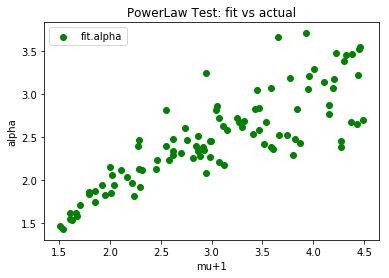

In [6]:
plt.scatter(mup1, data_alphas, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test: fit vs actual")



In [ ]:
data_alphas5k = []
M=5000
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in mus:
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data, xmax=np.max(data))
    data_alphas.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))



Calculating best minimal value for power law fit
/home/ubuntu/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


data sample: mu+1 1.502034368401449 alpha 1.494696571746923


Calculating best minimal value for power law fit


data sample: mu+1 1.5030633680385597 alpha 1.4826448841218927


Calculating best minimal value for power law fit


data sample: mu+1 1.5817031712653713 alpha 1.531663230488534


Calculating best minimal value for power law fit


data sample: mu+1 1.5860135907763349 alpha 1.562956233718356


Calculating best minimal value for power law fit


data sample: mu+1 1.6671022067785022 alpha 1.669357458998594


Calculating best minimal value for power law fit


data sample: mu+1 1.6785267322714899 alpha 1.6887862808126135


Calculating best minimal value for power law fit


data sample: mu+1 1.7377591919618185 alpha 1.8275347503774668


Calculating best minimal value for power law fit


data sample: mu+1 1.7720757570414094 alpha 1.7313799195701778


Calculating best minimal value for power law fit
/home/ubuntu/anaconda3/lib/python3.6/site-packages/powerlaw.py:1178: RuntimeWarning: overflow encountered in double_scalars
  return (self.alpha-1) * self.xmin**(self.alpha-1)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/powerlaw.py:825: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C
/home/ubuntu/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
Calculating best minimal value for power law fit


data sample: mu+1 1.8398306670496254 alpha 1.7719956156293324
data sample: mu+1 1.9405559847659732 alpha 1.9204393977008385


Calculating best minimal value for power law fit


data sample: mu+1 1.9450284912810607 alpha 1.8552953551044575


Calculating best minimal value for power law fit


data sample: mu+1 1.9459749275110532 alpha 1.961693284259569


Calculating best minimal value for power law fit


data sample: mu+1 1.9568443134926983 alpha 2.0265777025294085


Calculating best minimal value for power law fit


data sample: mu+1 1.9908981679624391 alpha 1.9733862051790283


Calculating best minimal value for power law fit


data sample: mu+1 2.101260474843394 alpha 2.090333177394583


Calculating best minimal value for power law fit


data sample: mu+1 2.124247810988352 alpha 1.9471262675031717


Calculating best minimal value for power law fit


data sample: mu+1 2.133606014727266 alpha 2.1217090303174198


Calculating best minimal value for power law fit


data sample: mu+1 2.1505786266239277 alpha 2.1221424588940163


Calculating best minimal value for power law fit


data sample: mu+1 2.1576359965040153 alpha 1.9763393267321643


Calculating best minimal value for power law fit


data sample: mu+1 2.162075185005544 alpha 2.0415343061114175


Calculating best minimal value for power law fit


data sample: mu+1 2.218651093715463 alpha 2.121932242495644


Calculating best minimal value for power law fit


data sample: mu+1 2.223216045383842 alpha 2.1402826812681974


Calculating best minimal value for power law fit


data sample: mu+1 2.228430268343744 alpha 2.127755428991491


Calculating best minimal value for power law fit


data sample: mu+1 2.2485570209333514 alpha 2.2332285880772025


Calculating best minimal value for power law fit


data sample: mu+1 2.254660398694201 alpha 2.218987137235139


Calculating best minimal value for power law fit


data sample: mu+1 2.2986095309645793 alpha 2.2517334241581812


Calculating best minimal value for power law fit


data sample: mu+1 2.301332231977246 alpha 2.119481983155679


Calculating best minimal value for power law fit


data sample: mu+1 2.3502526710845633 alpha 2.2206894352855318


Calculating best minimal value for power law fit


data sample: mu+1 2.359408685560624 alpha 2.2586514135936353


Calculating best minimal value for power law fit


data sample: mu+1 2.392553503418003 alpha 2.2353138050592554


Calculating best minimal value for power law fit


data sample: mu+1 2.450763298443354 alpha 2.4292384715519093


Calculating best minimal value for power law fit


data sample: mu+1 2.4697638678724827 alpha 2.332508009013466


Calculating best minimal value for power law fit


data sample: mu+1 2.5183170939998147 alpha 2.25831259510149


Calculating best minimal value for power law fit


data sample: mu+1 2.5214447218379994 alpha 2.489276151991915


Calculating best minimal value for power law fit


data sample: mu+1 2.5883899304155538 alpha 2.8504739008324824


Calculating best minimal value for power law fit


data sample: mu+1 2.593490488465285 alpha 2.526396907814918


Calculating best minimal value for power law fit


data sample: mu+1 2.6691975537594304 alpha 2.4008779033770375


Calculating best minimal value for power law fit


data sample: mu+1 2.713445456697102 alpha 2.4326883272828708


Calculating best minimal value for power law fit


data sample: mu+1 2.7551947477934795 alpha 2.479280165911681


Calculating best minimal value for power law fit


data sample: mu+1 2.789051428457186 alpha 2.5082862821909835


Calculating best minimal value for power law fit


data sample: mu+1 2.7957975585873562 alpha 2.811566201769966


Calculating best minimal value for power law fit


data sample: mu+1 2.802835176930416 alpha 2.627671829394035


Calculating best minimal value for power law fit


data sample: mu+1 2.8066307142060567 alpha 2.7518592207092354


Calculating best minimal value for power law fit


data sample: mu+1 2.840800297532851 alpha 2.2771455360942054


Calculating best minimal value for power law fit


data sample: mu+1 2.8609044782486515 alpha 2.544904261427374


Calculating best minimal value for power law fit


data sample: mu+1 2.8876132935409795 alpha 2.6550569046867314


Calculating best minimal value for power law fit


data sample: mu+1 2.9510812151271844 alpha 2.651663016564203


Calculating best minimal value for power law fit


data sample: mu+1 2.9664165573586754 alpha 2.940713607935902


Calculating best minimal value for power law fit


data sample: mu+1 2.9704114444232474 alpha 2.635541261328659


Calculating best minimal value for power law fit


data sample: mu+1 3.044473849867264 alpha 2.4702060010628086


Calculating best minimal value for power law fit


data sample: mu+1 3.079395492561036 alpha 2.6430670443838418


Calculating best minimal value for power law fit


data sample: mu+1 3.113428670541598 alpha 2.8804382391007604


Calculating best minimal value for power law fit


data sample: mu+1 3.11460383645253 alpha 2.9881157597765418


Calculating best minimal value for power law fit


data sample: mu+1 3.128114307547684 alpha 2.6286430558686087


Calculating best minimal value for power law fit


data sample: mu+1 3.1410839373873007 alpha 2.524027537485008


Calculating best minimal value for power law fit


data sample: mu+1 3.1600595710514523 alpha 2.479992427006704


Calculating best minimal value for power law fit


data sample: mu+1 3.2133581361211867 alpha 2.5218585083912313


Calculating best minimal value for power law fit


data sample: mu+1 3.228752825788834 alpha 2.762772274023139


Calculating best minimal value for power law fit


data sample: mu+1 3.246818439475878 alpha 2.812163587871573


Calculating best minimal value for power law fit


data sample: mu+1 3.261389194255764 alpha 2.944634055413996


Calculating best minimal value for power law fit


data sample: mu+1 3.28270606719497 alpha 2.7093685298636507


Calculating best minimal value for power law fit


data sample: mu+1 3.3413173039385615 alpha 2.7455184305820435


Calculating best minimal value for power law fit


data sample: mu+1 3.3510492150463813 alpha 2.4664991747915517


Calculating best minimal value for power law fit


data sample: mu+1 3.446684113984361 alpha 3.052519435604405


Calculating best minimal value for power law fit


data sample: mu+1 3.4492322439342815 alpha 2.583732572942539


Calculating best minimal value for power law fit


data sample: mu+1 3.467545733794192 alpha 2.7758484839204653


Calculating best minimal value for power law fit


data sample: mu+1 3.49924544741434 alpha 2.9228307179554838


Calculating best minimal value for power law fit


data sample: mu+1 3.508212654533568 alpha 3.2186241068368546


Calculating best minimal value for power law fit


data sample: mu+1 3.5163553405453785 alpha 2.790324340096037


Calculating best minimal value for power law fit


data sample: mu+1 3.561901371185308 alpha 3.243187043712579


Calculating best minimal value for power law fit


data sample: mu+1 3.5822966195557315 alpha 3.0998655055926148


Calculating best minimal value for power law fit


data sample: mu+1 3.5892498755354816 alpha 2.6299292563025976


Calculating best minimal value for power law fit


data sample: mu+1 3.62961008728002 alpha 3.061944404060927


Calculating best minimal value for power law fit


data sample: mu+1 3.641664465866805 alpha 3.170417043328009


Calculating best minimal value for power law fit


data sample: mu+1 3.6927751941706046 alpha 2.962346072391022


Calculating best minimal value for power law fit


data sample: mu+1 3.7136174307192853 alpha 2.6632925895432455


Calculating best minimal value for power law fit


data sample: mu+1 3.7331873814992154 alpha 2.8241861765520695


Calculating best minimal value for power law fit


data sample: mu+1 3.7519863708637184 alpha 2.9856562421271162


Calculating best minimal value for power law fit


data sample: mu+1 3.7566239752449686 alpha 3.0842283973896536


Calculating best minimal value for power law fit


data sample: mu+1 3.771092085666023 alpha 2.7885188326219725


Calculating best minimal value for power law fit


data sample: mu+1 3.7886708835996545 alpha 3.0125620110229714


Calculating best minimal value for power law fit


data sample: mu+1 3.811669826197861 alpha 3.0038345247562512


Calculating best minimal value for power law fit


data sample: mu+1 3.8433571585562736 alpha 3.2451225657065375


Calculating best minimal value for power law fit


data sample: mu+1 3.8560855086042527 alpha 2.895477319001131


Calculating best minimal value for power law fit


data sample: mu+1 3.97929241811317 alpha 3.0254942529939544


Calculating best minimal value for power law fit


data sample: mu+1 3.9832219238857185 alpha 3.064678003215895


Calculating best minimal value for power law fit


data sample: mu+1 4.028234257149443 alpha 3.0871876174981323


Calculating best minimal value for power law fit


data sample: mu+1 4.075963376096198 alpha 2.855677716654186


Calculating best minimal value for power law fit


data sample: mu+1 4.178547349966457 alpha 3.4182453175545744


Calculating best minimal value for power law fit


data sample: mu+1 4.22492564755769 alpha 3.0529980457329566


Calculating best minimal value for power law fit


data sample: mu+1 4.2458753019031965 alpha 3.6614225565554537


Calculating best minimal value for power law fit


data sample: mu+1 4.2820582518315495 alpha 3.009231952470965


Calculating best minimal value for power law fit


data sample: mu+1 4.290875489072553 alpha 3.5911152267555395


Calculating best minimal value for power law fit


data sample: mu+1 4.336171402246839 alpha 3.0590816932447


Calculating best minimal value for power law fit


data sample: mu+1 4.358644395195216 alpha 3.5972938540639845


Calculating best minimal value for power law fit


data sample: mu+1 4.4070564710211695 alpha 3.006478507794726


Calculating best minimal value for power law fit


data sample: mu+1 4.438015248573218 alpha 3.0493397053429145


Calculating best minimal value for power law fit


data sample: mu+1 4.447170891561628 alpha 2.948204923018383


Calculating best minimal value for power law fit


data sample: mu+1 4.460857393806812 alpha 3.2457190300176055


Calculating best minimal value for power law fit


In [ ]:
mup1 = np.array(mus)+1.0

plt.scatter(mup1[0:len(data_alphas5k)], data_alphas5k, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test (w/xmax): fit vs actual")

### Try KS method instead of Maximum Likeliehood

In [ ]:
data_alphas = []
M=1000
mus=np.sort(3*np.random.random_sample(100)+.5)
for mu in mus:
    
    data = np.random.pareto(mu,size=(M))
    
    fit = powerlaw.Fit(data, xmax=np.max(data), fit_method="KS")
    data_alphas10k.append(fit.alpha)    
    print("data sample: mu+1 {} alpha {}".format(mu+1, fit.alpha))


In [ ]:
mup1 = np.array(mus)+1.0

plt.scatter(mup1[0:len(data_alphas)], data_alphas, color='green', label='fit.alpha')
plt.xlabel("mu+1")
plt.ylabel('alpha')
plt.legend()
plt.title("PowerLaw Test (w/xmax, KS): fit vs actual")